# Práctica 6: Support Vector Machines
  ##     Agustín Jofré Millet

### 1. Support Vector Machines

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
import sklearn.svm
import math
from process_email import email2TokenList
from get_vocab_dict import getVocabDict
import warnings
warnings.filterwarnings('ignore')

data = scipy.io.loadmat('ex6data1.mat')
X = data['X']
y = data['y']

In [4]:
def visualizaDatos(X,y) :   
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    plt.figure(figsize=(10,8))

    plt.scatter(X[pos, 0], X[pos, 1],s=50, c = 'k', marker='+')
    plt.scatter(X[neg, 0], X[neg, 1],s=50, c = 'y', marker='o')

    

def plot_decisionboundary(X, Y, theta):
 
    plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    
    visualizaDatos(X,Y)
    
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),xx1.ravel(),xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

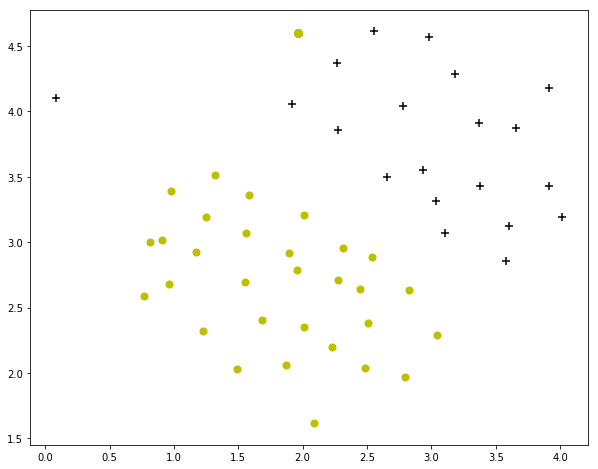

In [5]:
visualizaDatos(X, y)

### 1.1. Kernel lineal

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def visualizaDatos(X,y) :   
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    plt.figure(figsize=(10,8))

    plt.scatter(X[pos, 0], X[pos, 1],s=50, c = 'k', marker='+')
    plt.scatter(X[neg, 0], X[neg, 1],s=50, c = 'y', marker='o')


def plot_decisionboundary(X, y, svc):
    
    # visualizar datos
    visualizaDatos(X, y)
    
    
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    val = np.zeros(X1.shape)
    for ii in range(100):
        this_X = np.vstack((X1[:,ii], X2[:,ii])).T
        val[:, ii] = svc.predict(this_X)
        
    plt.contour(X1, X2, val, [0,5], linewidths=1, colors='g')

Text(0.5,1,'C=100')

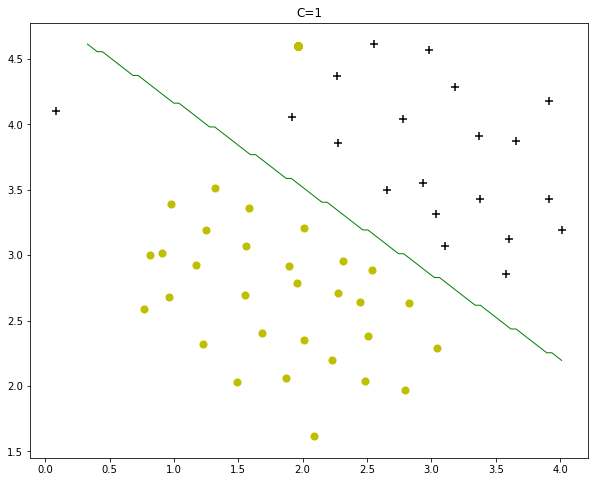

<Figure size 432x288 with 0 Axes>

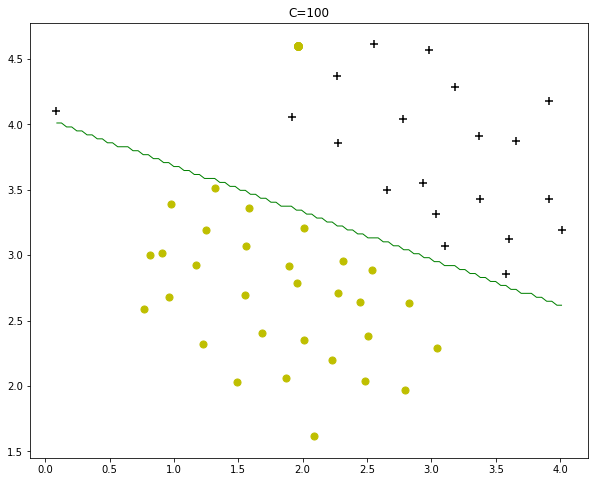

In [12]:

#C = 1.0
clf = sklearn.svm.SVC(kernel='linear',C=1.0 )
clf.fit(X, y.ravel()) 

plot_decisionboundary(X, y, svc)
plt.title('C=1')

# C = 100

clf = sklearn.svm.SVC(kernel='linear',C=100.0 )
clf.fit(X, y.ravel()) 

plt.figure()
plot_decisionboundary(X, y, svc)
plt.title('C=100')

### 1.2. Kernel gaussiano

$$
K_{gaussian}(x^{(i)}, x^{(j)}) = exp(-\frac{\|x^{(i)}-x^{(j)}\|^2}{2\sigma^2}) = exp(-\frac{\sum\limits^n_{k=1}(x^{(i)}_k-x^{(j)}_k)^2}{2\sigma^2}) $$

La función de kernel gaussiano calcula la distancia entre dos ejemplos de entrenamiento

In [13]:
def kernelGaussiano(x1, x2, sigma):
    
    x1 = x1.reshape((x1.size, 1))
    x2 = x2.reshape((x1.size, 1))

    sim = 0

    sim = np.exp(-np.sum((x1-x2)**2)/2/sigma/sigma)

    return sim

In [14]:
x1 = np.array([1, 3, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = kernelGaussiano(x1, x2, sigma)

print((sigma, sim))

(2, 0.4723665527410147)


In [15]:
data2 = scipy.io.loadmat('ex6data2.mat')
X = data2['X']
y = data2['y']

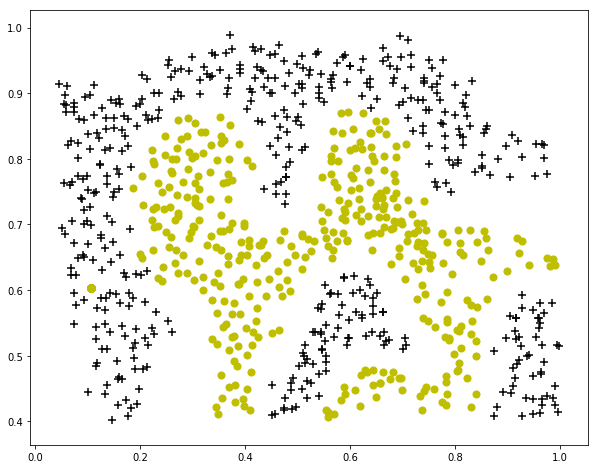

In [16]:
visualizaDatos(X, y)

Text(0.5,1,'C=1.000000')

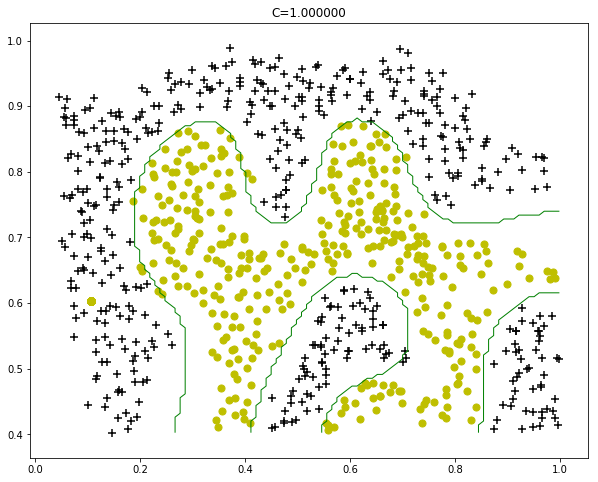

In [17]:
# SVM Parameters
C = 1
sigma = 0.1
gamma = 1 / 2 / sigma**2

clf = sklearn.svm.SVC(kernel='rbf',C=C, gamma=gamma)
clf.fit(X, y.ravel()) 

plot_decisionboundary(X, y, svm)
plt.title('C=%f'%C)

### 1.3. Elección de los parámetros C y sigma

In [18]:
data3 = scipy.io.loadmat('ex6data3.mat')
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

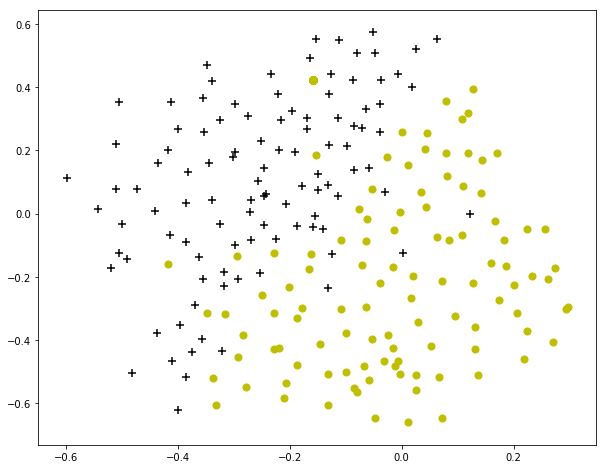

In [19]:
visualizaDatos(X, y)

In [22]:
def eleccionParametro(X, y, Xval, yval):


    C_vec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]);
    sigma_vec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]);

    actual_error = math.inf

    for cur_C in C_vec:
        for cur_sigma in sigma_vec:
            gamma = 1 / 2 / cur_sigma**2
            clf = sklearn.svm.SVC(C=cur_C, kernel='rbf', gamma=gamma)
            clf.fit(X, y.ravel()) 

            prediction = clf.predict(Xval)
            
            error = np.mean(prediction!=yval.flatten());
            
            if(error < actual_error):
                actual_error = error
                C = cur_C
                sigma = cur_sigma

    print('El mejor parametro encontrado, C=%f sigma=%f: error=%f' % (C, sigma, actual_error))
    
    return (C, sigma)

El mejor parametro encontrado, C=1.000000 sigma=0.100000: error=0.035000


Text(0.5,1,'C=1.000000, sigma=0.100000')

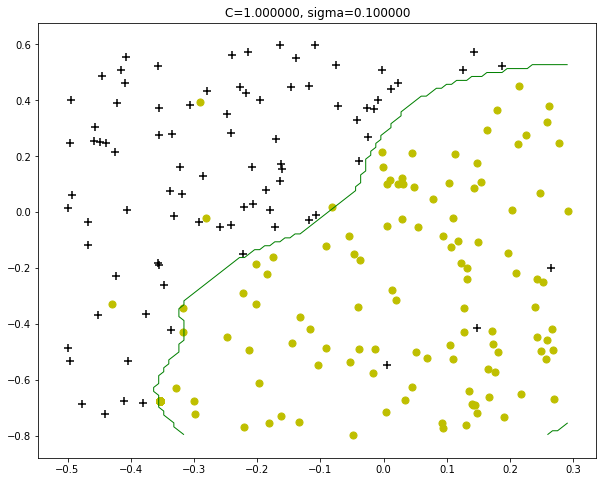

In [23]:

C, sigma = eleccionParametro(X, y, Xval, yval)
gamma = 1 / 2 / sigma**2


clf = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y.ravel()) 

plot_decisionboundary(Xval, yval, clf)
plt.title('C=%f, sigma=%f'% (C, sigma))

### 2. Detección de spam

In [24]:
import codecs
email_contents = codecs.open( 'spam/0001.txt', 'r',encoding='utf-8', errors='ignore').read()
tokens = email2TokenList ( email_contents )
vocab_dic = getVocabDict()

print('Email: \n')
print(email_contents)
print('\n\n')

print('Tockens: \n')
print(tokens)
print('\n\n')

print('Diccionario: \n')
print(len(vocab_dic))
print('\n\n')

# Print Stats
print('Tam del vector caracteristicas: %d\n' % len(vocab_dic))


Email: 

From 12a1mailbot1@web.de  Thu Aug 22 13:17:22 2002
Return-Path: <12a1mailbot1@web.de>
Delivered-To: zzzz@localhost.example.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.example.com (Postfix) with ESMTP id 136B943C32
	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received: from mail.webnote.net [193.120.211.219]
	by localhost with POP3 (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received: from dd_it7 ([210.97.77.167])
	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623
	for <zzzz@example.com>; Thu, 22 Aug 2002 13:09:41 +0100
From: 12a1mailbot1@web.de
Received: from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);
	 Sat, 24 Aug 2002 09:42:10 +0900
To: <dcek1a1@netsgo.com>
Subject: Life Insurance - Why Pay More?
Date: Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version: 1.0
Message-ID: <0103c1042001882DD_IT7@dd_it7>
Content-Type: text/html; charset="iso-8859-1"
Content


#### Leemos los directorios spam , y no spam(dificil y facil de detectar)

In [25]:
directorio = "spam"
i=1
email_spam = codecs.open('{0}/{1:04d}.txt'.format(directorio, i), 'r',encoding='utf-8', errors='ignore').read()

directorio = "easy_ham"
i=1
email_easy_ham = codecs.open('{0}/{1:04d}.txt'.format(directorio, i), 'r',encoding='utf-8', errors='ignore').read()

directorio = "hard_ham"
i=1
email_hard_ham = codecs.open('{0}/{1:04d}.txt'.format(directorio, i), 'r',encoding='utf-8', errors='ignore').read()



In [26]:
def crearVectorEmail ( raw_email, vocab_dic):
    n = len(vocab_dic)
    vector = np.zeros((n, 1))
    
    tokenList = email2TokenList ( raw_email )
    index_list = [ vocab_dic[token] for token in tokenList if token in vocab_dic ]
    
    for idx in index_list:
        vector[idx] = 1
    return vector

In [27]:
num_spam_train = int(len(email_spam) *0.6)
num_easyham_train = int(len(email_easy_ham) *0.6)
num_hardham_train = int(len(email_hard_ham) *0.6)

spam_train = [crearVectorEmail(x, vocab_dic)
             for x in email_spam[:num_spam_train]]

easyham_train = [crearVectorEmail(x, vocab_dic)
             for x in email_easy_ham[:num_easyham_train]]

hardham_train = [crearVectorEmail(x, vocab_dic)
             for x in email_hard_ham[:num_hardham_train]]

Xtrain = np.concatenate(hardham_train+easyham_train+spam_train,axis=1).T
ytrain = np.concatenate((np.zeros((num_hardham_train+num_easyham_train,1)),
     np.ones((num_spam_train,1))
    ), axis=0)



In [28]:
#Validacion
num_spam_val = int(len(email_spam) *0.2)
num_easyham_val = int(len(email_easy_ham) *0.2)
num_hardham_val = int(len(email_hard_ham) *0.2)

spam_val = [crearVectorEmail(x, vocab_dic)
             for x in email_spam[num_spam_train:num_spam_train+num_spam_val]]

easyham_val = [crearVectorEmail(x, vocab_dic)
             for x in email_easy_ham[num_easyham_train:num_easyham_train+num_easyham_val]]

hardham_val = [crearVectorEmail(x, vocab_dic)
             for x in email_hard_ham[num_hardham_train:num_hardham_train+num_hardham_val]]

Xval = np.concatenate(hardham_val+easyham_val+spam_val,axis=1).T
yval = np.concatenate((np.zeros((num_hardham_val+num_easyham_val,1)),
     np.ones((num_spam_val,1))
    ), axis=0)



In [29]:
#test
num_spam_test = len(email_spam) - num_spam_val - num_spam_train
num_easyham_test = len(email_easy_ham) - num_easyham_val - num_easyham_train
num_hardham_test = len(email_hard_ham) - num_hardham_val - num_hardham_train

spam_test = [crearVectorEmail(x, vocab_dic)
             for x in email_spam[-num_spam_test:]]

easyham_test = [crearVectorEmail(x, vocab_dic)
             for x in email_easy_ham[-num_easyham_test:]]

hardham_test = [crearVectorEmail(x, vocab_dic)
             for x in email_hard_ham[-num_hardham_test:]]

Xtest = np.concatenate(hardham_test+easyham_test+spam_test,axis=1).T
ytest = np.concatenate((np.zeros((num_easyham_test+num_hardham_test,1)),
     np.ones((num_spam_test,1))
    ), axis=0)



In [32]:
m_clf = sklearn.svm.SVC(C=0.1, kernel='linear')
m_clf.fit( Xtrain, ytrain.flatten() )

prediccion = m_clf.predict(Xtest).reshape((ytest.shape[0],1))
test = 100. * float(sum(prediccion == ytest))/ytest.shape[0]
print ('Precicion del conjunto de prueba = %0.2f%%' % test)

Precicion del conjunto de prueba = 88.61%
